# POSTTEST 6

## NAMA : WINA AULIA NUGRASARI
## NIM  : 2109106118

### import library

In [77]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, accuracy_score

data = pd.read_csv('Breast_Cancer.csv')
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


### Datasplit Pada Dataset

Import Library Untuk Datasplit

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [79]:
X = data.iloc[:,:-1] 
y = data.iloc[:,-1]

Mengubah Variabel target Menjadi 0 & 1

In [80]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Memisahkan Kolom Numerik Dan Kategorikal

In [81]:
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

Menggunakan OneHotEncoder Untuk Kolom Kategorikal

In [82]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

In [84]:
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

Konversi Dataset Menjadi Float32

In [85]:
X_train[numeric_cols] = X_train[numeric_cols].astype('float32')
X_test[numeric_cols] = X_test[numeric_cols].astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

### Model Sequential

In [86]:
import tensorflow as tf
from tensorflow import keras

In [95]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape = (None, 101)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

In [96]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, None, 64)          6528      
                                                                 
 dense_20 (Dense)            (None, None, 32)          2080      
                                                                 
 dense_21 (Dense)            (None, None, 1)           33        
                                                                 
Total params: 8641 (33.75 KB)
Trainable params: 8641 (33.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
input_dim = X_train_encoded.shape[1]  
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))

model.add(Dense(1, activation='sigmoid'))  

In [99]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Menggunakan Callbacks

In [100]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.93 and logs.get('val_accuracy') > 0.93):
            self.model.stop_training = True

### Melatih Model

In [101]:
call = MyCallback()
history = model.fit(
    X_train_encoded,
    y_train,
    epochs=10,
    batch_size = 32,
    validation_data=(X_test_encoded, y_test),
    callbacks=[call]
)


Epoch 1/10
101/101 [==============================] - 1s 6ms/step - loss: 0.4901 - accuracy: 0.8155 - val_loss: 0.4061 - val_accuracy: 0.8509
Epoch 2/10
101/101 [==============================] - 0s 4ms/step - loss: 0.4137 - accuracy: 0.8459 - val_loss: 0.3931 - val_accuracy: 0.8509
Epoch 3/10
101/101 [==============================] - 0s 4ms/step - loss: 0.4064 - accuracy: 0.8459 - val_loss: 0.3873 - val_accuracy: 0.8509
Epoch 4/10
101/101 [==============================] - 0s 4ms/step - loss: 0.4015 - accuracy: 0.8459 - val_loss: 0.3829 - val_accuracy: 0.8509
Epoch 5/10
101/101 [==============================] - 0s 5ms/step - loss: 0.3976 - accuracy: 0.8459 - val_loss: 0.3793 - val_accuracy: 0.8509
Epoch 6/10
101/101 [==============================] - 0s 4ms/step - loss: 0.3945 - accuracy: 0.8459 - val_loss: 0.3763 - val_accuracy: 0.8509
Epoch 7/10
101/101 [==============================] - 0s 4ms/step - loss: 0.3921 - accuracy: 0.8459 - val_loss: 0.3742 - val_accuracy: 0.8509
Epoch 

### Evaluasi Model

In [93]:
score = model.evaluate(X_test_encoded, y_test, verbose=1)
print('Test loss     :', score[0])
print('Test accuracy :', score[1])

26/26 [==============================] - 0s 3ms/step - loss: 0.3718 - accuracy: 0.8522
Test loss     : 0.37178441882133484
Test accuracy : 0.852173924446106


### Grafik perbandingan accuracy dan loss dari train dan test

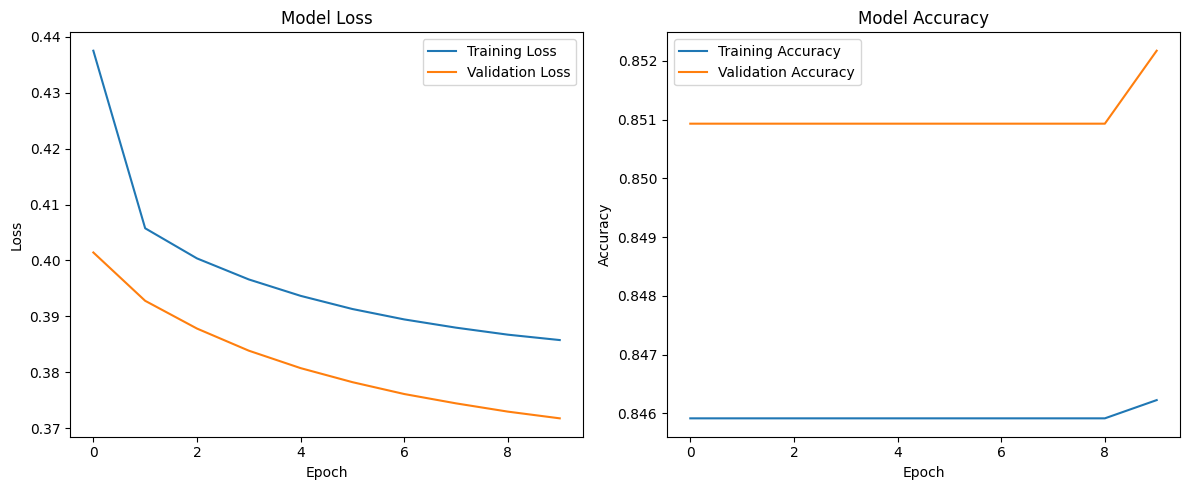

In [94]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()